<a href="https://colab.research.google.com/github/toluwee/Computer-Vision-Project/blob/master/Image_Classifier_CNN_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying Fashion MNIST Dataset with CNN Deep Learning 

## Project Overview

I created an image classification application using a deep neural network with convolutions. This application trains a deep learning model on a dataset of images. It then uses the trained model to classify new images.



## Key Skills Demonstrated:

* Tensorflow and convolutional neural networks
* Model validation and evaluation

## About dataset

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

More information about the dataset available [here](https://github.com/zalandoresearch/fashion-mnist)  

## Objective 

To create a model that correctly classifies images of fashion items

## Import Libraries

Necessary libraries are imported

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

## Import Dataset

In [8]:
#  Import the fashion MNIST dataset from keras dataset into randomly pre-shuffled training and test data
(X_train,y_train), (X_test, y_test) = tf.keras.fashion_mnist.load_data()

### Explore Dataset 

In [9]:
# Shape of training set
print (X_train.shape)

# Confirm data type
print(X_train.dtype)

(60000, 28, 28)
uint8


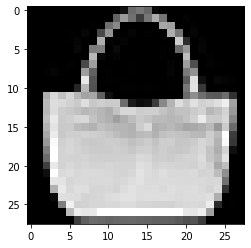

In [10]:

# View sample image
plt.imshow(X_train[100],cmap='gray')

## Data Preprocessing

In [11]:
# reshape dataset dimensions to have a single channel
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
 
# Normalize the pixel values of the images to the 0-1 range from 0-255 range by dividing by 255.0
X_train = X_train/ 255.0
X_test = X_test/ 255.0

# Seperate validation set from training dataset
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [12]:
# from f.keras.preprocessing.image import ImageDataGenerator


# train_datagen = ImageDataGenerator(
#     # zoom_range=[0.5,1.0],
#                                   #  brightness_range=[0.2,1.0],
#                                   #  rotation_range=90,
#                                   #  horizontal_flip=True,
#                                   #  height_shift_range=0.5,
#                                   #  width_shift_range=[-200,200],                                   
#                                    )
# validation_datagen = ImageDataGenerator(
#     # zoom_range=[0.5,1.0],
#     #                                brightness_range=[0.2,1.0],
#     #                                rotation_range=90,
#                                   #  horizontal_flip=True,
#                                   #  height_shift_range=0.5,
#                                   #  width_shift_range=[-200,200],
#                                    )
# test_datagen = ImageDataGenerator(
#     # zoom_range=[0.5,1.0],
#                                   #  brightness_range=[0.2,1.0],
#                                   #  rotation_range=90,
#                                   #  horizontal_flip=True,
#                                   #  height_shift_range=0.5,
#                                   #  width_shift_range=[-200,200],
#                                    )

# # Flow training images in batches of 128 using train_datagen generator

# train_gen = train_datagen.flow(x=X_train, 
#                                       y=y_train,
#                                       # target_size=(28,28),  # All images will be resized to 28x 28
#                                       batch_size=32,
#                                       )

# valid_gen = validation_datagen.flow(x=X_valid, 
#                                       y=y_valid,
#                                       # target_size=(28,28),  # All images will be resized to 28x 28
#                                       batch_size=32,
#                                       )


# test_gen = test_datagen.flow(x=X_test, 
#                                       y=y_test,
#                                       # target_size=(28,28),  # All images will be resized to 28x 28
#                                       batch_size=32,
#                                       )


### Assign class names

In [13]:
#  Define the class labels
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

#  Get a sample label with 
print(class_names[y_train[100]])


Pullover


## Model Definition

Keras will be used to build and implement the model.
To define the model: 
*  Convolutional layers are added 
* Final result flattened to feed into the densely connected layers.
* Densely connected layers added

In [14]:
#  Refresh tensorflow environment 
tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [15]:
# This callback will stop the training when there is no improvement in  
# the validation loss for three consecutive epochs.
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)


In [16]:
# Model definition

model = tf.keras.models.Sequential([
                                    
    # This is the first convolution layer to slightly reduce the size of the feature maps 
    tf.keras.layers.Conv2D(16, (3,3), padding="same", activation='relu', input_shape=(28,28,1)),
    
    # Pooling layer halves the dimension
    tf.keras.layers.MaxPooling2D(2, 2),

    # Randomly applies dropouts that sets input units to 0 with a frequency of rate 0.3 to prevent overfitting.
    tf.keras.layers.Dropout(0.3),

    # The second convolution layer
    tf.keras.layers.Conv2D(32, (3,3), padding="same", activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),

    # The third convolution layer
    tf.keras.layers.Conv2D(64, (3,3), padding="same", activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),

    # Flatten the results 
    tf.keras.layers.Flatten(),

    # densely connected hidden layer with 512 neuron
    tf.keras.layers.Dense(512, activation='relu'),
 
    # Contains 10 output neuron. It will contain a value from 0-9 where 0 for "T-shirt/top" and 9 for "Ankle boot"
    tf.keras.layers.Dense(10, activation='softmax')
])


#  Description of model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          1

In [17]:
# Actual building of the model
model.compile(optimizer= 'nadam',
              loss= 'sparse_categorical_crossentropy',
              metrics= ['accuracy']) # accuracy is measured cos it is classification

## Train Model

In [ ]:
history = model.fit(
                    x= X_train, 
                    y= y_train, 
                    # train_gen,
                    epochs= 50, 
                    verbose = 1,
                    validation_data =(X_valid, y_valid),
                    callbacks = [callback]
)

Epoch 1/50
1719/1719 [==============================] - 63s 36ms/step - loss: 0.8101 - accuracy: 0.6949 - val_loss: 0.3706 - val_accuracy: 0.8648
Epoch 2/50
1719/1719 [==============================] - 62s 36ms/step - loss: 0.4212 - accuracy: 0.8408 - val_loss: 0.3032 - val_accuracy: 0.8876
Epoch 3/50
1719/1719 [==============================] - 62s 36ms/step - loss: 0.3648 - accuracy: 0.8654 - val_loss: 0.2896 - val_accuracy: 0.8918
Epoch 4/50
1719/1719 [==============================] - 61s 36ms/step - loss: 0.3288 - accuracy: 0.8744 - val_loss: 0.2619 - val_accuracy: 0.9002
Epoch 5/50
1719/1719 [==============================] - 63s 36ms/step - loss: 0.3158 - accuracy: 0.8832 - val_loss: 0.2496 - val_accuracy: 0.9046
Epoch 6/50
1719/1719 [==============================] - 63s 37ms/step - loss: 0.2927 - accuracy: 0.8906 - val_loss: 0.2441 - val_accuracy: 0.9064
Epoch 7/50
1719/1719 [==============================] - 63s 36ms/step - loss: 0.2871 - accuracy: 0.8928 - val_loss: 0.2364 -

In [ ]:
# plot of loss and accuracy history 
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.gca().set_ylim(0,1) #set the vertical range to [0-1]
plt.xlabel('Epochs')
plt.ylabel('Fraction')
plt.show()



## Model Description

In [ ]:
#generate image of model 
keras.utils.plot_model(model)

## Predictions on Test Data


In [ ]:
y_pred  = model.predict(X_test).round(2) #this would give the probability of all classes
y_pred[:20]

In [ ]:
y_pred =np.argmax(y_pred, axis=-1) # this would give classes with the highest probability
y_pred[:20]

In [ ]:
# To cross check with actual value of y
y_test[:20]

In [ ]:
np.array(class_names)[y_pred]

## Evaluation on Test Data

### Accuracy

In [ ]:
# Test data accuracy
_, acc = model.evaluate(X_test, y_test)
print('Test Dataset Accuracy: %.3f' % (acc * 100.0))


### Confusion Matrix

In [ ]:
#  Define confusion matrix
con_mat = confusion_matrix(y_test, y_pred)
confu_mat = con_mat / con_mat.sum(axis=1)

# Print Confusion matrix
print("Confusion matrix: \n", con_mat)

# Plot Confusion matrix
plt.figure(figsize=(7,7))
plt.imshow(confu_mat, interpolation='nearest', cmap='viridis')
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_test, y_pred))

The matrix and classification report show the fraction of true predictions for each class. The prediction of the 'shirt' class is the least reliable of all the classes.
While 'coats' and bags are predicted with greater accuracy.

### Visualize accuracy

In [ ]:
# Visualise 20 random test images along with their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=20, replace=False)):
    ax = figure.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_test[index]), cmap='Greys')
    predict_index = y_pred[index]
    true_index = y_test[index]
    # Set the title for each image
    ax.set_title("Ground truth: {}\nPredicted: {}".format(class_names[predict_index],
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.tight_layout()

## Predictions on Validation Data


In [ ]:
y_pred_val  = model.predict(X_valid).round(2) #this would give the probability of all classes
y_pred_val[:20]

In [ ]:
y_pred_val =np.argmax(y_pred_val, axis=-1) # this would give classes with the highest probability
y_pred_val[:20]

In [ ]:
# To cross check with actual value of y
y_valid[:20]

In [ ]:
np.array(class_names)[y_pred_val]

## Evaluation on Validation Data

### Accuracy

In [ ]:
# Test data accuracy
_, acc = model.evaluate(X_valid, y_valid)
print('Validation Dataset Accuracy: %.3f' % (acc * 100.0))


### Confusion Matrix

In [ ]:
#  Define confusion matrix
con_mat = confusion_matrix(y_valid, y_pred_val)
confu_mat = con_mat / con_mat.sum(axis=1)

# Print Confusion matrix
print("Confusion matrix for validation data: \n", con_mat)

# Plot Confusion matrix
plt.figure(figsize=(7,7))
plt.imshow(confu_mat, interpolation='nearest', cmap='viridis')
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')


In [ ]:
print(classification_report(y_valid, y_pred_val))

The results of the matrix and classification report show the same trend as with the test data. The prediction of the 'shirt' class is the least reliable of all the classes.
While 'coats' and bags are predicted with greater accuracy.

### Visualize accuracy

In [ ]:
# Visualise 20 random test images along with their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_valid.shape[0], size=20, replace=False)):
    ax = figure.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_test[index]), cmap='Greys')
    predict_index = y_pred[index]
    true_index = y_test[index]
    # Set the title for each image
    ax.set_title("Ground truth: {}\nPredicted: {}".format(class_names[predict_index],
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.tight_layout()